# Making Cool Visualizations from Images



## Imports


Pandas is an all-purpose package for working with tables. 

Plotly is my favorite chart-builder for python. However, MatplotLib and Seaborn can do the exact same things! It is here to preview our data before we bring it into Tableau. 

PIL (Python Image Library, otherwise known as Pillow) allows us to manipulate images.

NumPy and Random are for getting the points. 

In [186]:
import pandas as pd
import plotly.express as px
from PIL import Image
import numpy as np
import random

# Loading our Image

We'll start by using PIL to load our image and convert it to grayscale. 

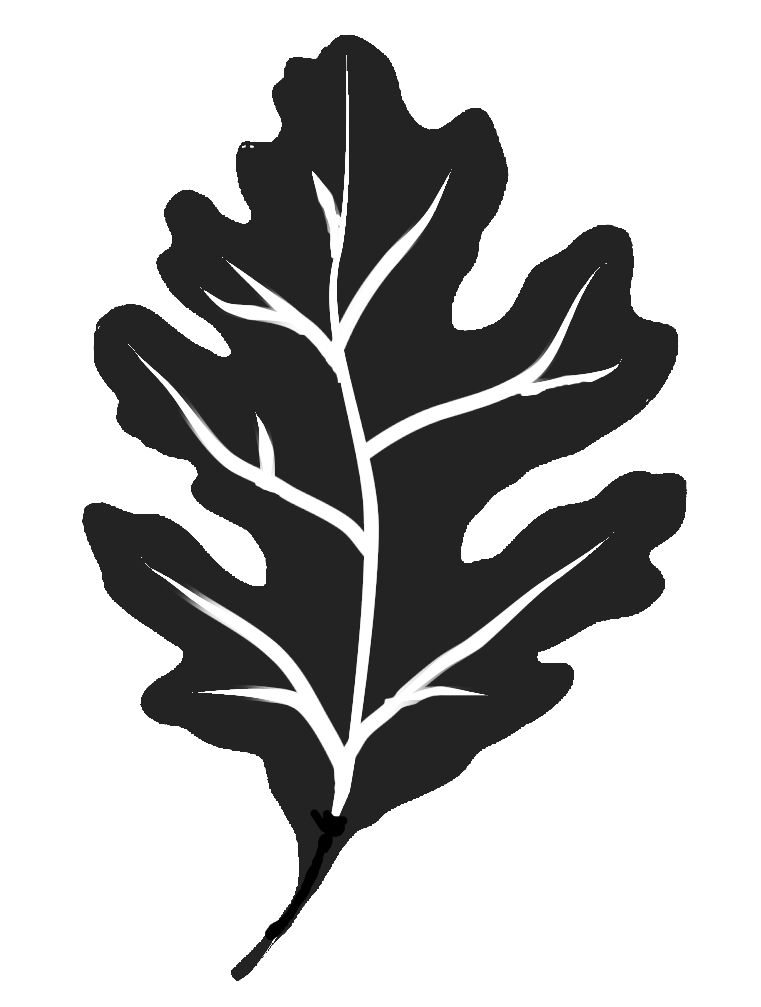

In [187]:
image_path = r"images\OakLeaf.png"
img = Image.open(image_path).convert("L")
display(img)

With our image loaded, we can easily create a NumPy array, which also gives us the height and width.

In [188]:
img_array = np.array(img)

#What are we making?
print(img_array[100])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

While it does not look like much, this is actually our image! All of the points correspond to a pixel in the data. Pixels with the value **255** are white, while pixels with **0** are black. This will be how we determine where the points need to be generated. 

If a massive image is limiting performance, we can easily resize it. This will not effect our point cloud, as we just need to know dark VS light pixels. 

In [189]:
img = img.resize((256, 256))  

#re-make the array
img_array = np.array(img)

#it's the same image, just shrunk!
img_array.shape

(256, 256)

# Finding The Shape of the Shape

Once the array has been generated, we will look for pixels within a certain **threshold** of black. If a pixel's value is less than the threshold, we will store the X and Y position in a tuple and add it to coords. 

In [190]:
height, width = img_array.shape

#as white = 255 and black = 0, we could say anything under 128 is dark enough to be the shape we are looking for
threshold = 128

coords = []
#as a for loop
for y in range(height):
    for x in range(width):
        if img_array[y, x] < threshold:
            coords.append((x, y))

#as a list comphrehension.
coords = [(x, y)
            for y in range(height) 
            for x in range(width) 
            if img_array[y, x] < threshold]

Now that the coordinates are defined, we can randomly sample a desired number of points. 

In [191]:
num_points = 5000

sampled_coords = random.sample(coords, min(num_points, len(coords)))

Then store it in a dataframe for easy use displaying and joining with the original dataset.

In [192]:
df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

... and plot to see how it looks!

# Seeing the Scatter Plot

In [193]:
fig = px.scatter(df, x="x", y="y", width=600, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, visible=True),
    yaxis=dict(showgrid=False, visible=True),
)

fig.update_traces(marker=dict(size=3, color='darkgrey', opacity=0.8))

fig.show()

Ta-Da! It's upside down. This makes sense, as we appeneded all the points to our array starting at y=0 (the top)

In [194]:
df['y'] = (height // 2) - df['y']

In [195]:
fig = px.scatter(df, x="x", y="y", width=600, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, visible=True),
    yaxis=dict(showgrid=False, visible=True),
)

fig.update_traces(marker=dict(size=3, color='darkgrey', opacity=0.8))

fig.show()

It's a very easy flip.

I also prefer the data be centered around (0,0) for tableau

In [196]:
df['x'] = df['x'] - (width // 2)
df['y'] = (height // 2) - df['y']

This is optional!

# Grid Spacing

# Putting it all together!

The above section breaks the code into more detail, but we really just want to quickly generate plots to test and see what we want to keep. 

As such, it makes sense for this to be a function instead of segmented code blocks. 

In [197]:
def image_to_points(image_path, num_points=500, threshold=128):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)

    height, width = img_array.shape

    # Get all pixel coordinates below the threshold
    coords = [(x, y) for y in range(height) for x in range(width) if img_array[y, x] < threshold]

    if len(coords) == 0:
        raise ValueError("No dark pixels found in image.")

    # Sample a limited number of points
    sampled_coords = random.sample(coords, min(num_points, len(coords)))
    df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

    # Center coordinates around (0, 0)
    df['x'] = df['x'] - (width // 2)
    df['y'] = (height // 2) - df['y']  # Flip y

    return df

In [198]:
def plot_points(df, mark_size = 3):
    fig = px.scatter(df, x="x", y="y", width=600, height=600)

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showgrid=False, visible=True),
        yaxis=dict(showgrid=False, visible=True),
    )

    fig.update_traces(marker=dict(size=mark_size, color='darkgrey', opacity=0.8))
    fig.update_yaxes(scaleanchor="x", scaleratio=1)

    fig.show()

# All in one step!

In [199]:
image_path = r"images\OakLeaf.png"
points_df = image_to_points(image_path, num_points=2000)
plot_points(points_df, 3)

# Expanding this with symmetry

One of my major gripes with Automeris was the lack of symmetrical points. Luckily, that is easy to add!

In [200]:
def image_to_points_symmetry(image_path, num_points=500, x_symmetry=False, y_symmetry=False, threshold=128):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img = img.resize((256, 256))
    img_array = np.array(img)

    height, width = img_array.shape

    # Determine region to sample based on symmetry
    x_limit = width // 2 if x_symmetry else width
    y_limit = height // 2 if y_symmetry else height

    # Get coordinates of "black" pixels in region
    coords = [(x, y) for y in range(y_limit) for x in range(x_limit) if img_array[y, x] < threshold]

    if len(coords) == 0:
        raise ValueError("No dark pixels found in selected region of image.")

    sampled_coords = random.sample(coords, min(num_points, len(coords)))
    df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

    mirrored = []

    if x_symmetry:
        mirrored.extend(df.assign(x=lambda d: width - d['x']).values)
    if y_symmetry:
        mirrored.extend(df.assign(y=lambda d: height - d['y']).values)
    if x_symmetry and y_symmetry:
        mirrored.extend(df.assign(x=lambda d: width - d['x'], y=lambda d: height - d['y']).values)

    if mirrored:
        df = pd.concat([df, pd.DataFrame(mirrored, columns=['x', 'y'])])

    df.drop_duplicates(inplace=True)

    # Center points around (0, 0)
    df['x'] = df['x'] - (width // 2)
    df['y'] = (height // 2) - df['y']  # Flip y

    return df

In [201]:
points_df = image_to_points_symmetry(image_path, num_points=2000, x_symmetry=True, y_symmetry=False)
plot_points(points_df)

# Grid Spacing

Instead of sampling randomly, we can also sample in a grid pattern for a more uniform look. 

In [202]:
def image_to_points_symmetry_grid(image_path, num_points=500, x_symmetry=False, y_symmetry=False, threshold=128):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img = img.resize((256, 256))
    img_array = np.array(img)

    height, width = img_array.shape

    # Determine region to sample based on symmetry
    x_limit = width // 2 if x_symmetry else width
    y_limit = height // 2 if y_symmetry else height

    # Estimate grid spacing
    grid_area = x_limit * y_limit
    spacing = int(np.sqrt(grid_area / num_points)) or 1  # Prevent spacing = 0

    coords = []
    for y in range(0, y_limit, spacing):
        for x in range(0, x_limit, spacing):
            if img_array[y, x] < threshold:
                coords.append((x, y))
                if len(coords) >= num_points:
                    break
        if len(coords) >= num_points:
            break

    # Grid sample using list comprehension
    coords = [
        (x, y)
        for y in range(0, y_limit, spacing)
        for x in range(0, x_limit, spacing)
        if img_array[y, x] < threshold
    ][:num_points]  # Limit to num_points

    if len(coords) == 0:
        raise ValueError("No dark pixels found in selected region of image.")

    df = pd.DataFrame(coords, columns=['x', 'y'])

    mirrored = []

    if x_symmetry:
        mirrored.extend(df.assign(x=lambda d: width - d['x']).values)
    if y_symmetry:
        mirrored.extend(df.assign(y=lambda d: height - d['y']).values)
    if x_symmetry and y_symmetry:
        mirrored.extend(df.assign(x=lambda d: width - d['x'], y=lambda d: height - d['y']).values)

    if mirrored:
        df = pd.concat([df, pd.DataFrame(mirrored, columns=['x', 'y'])])

    df.drop_duplicates(inplace=True)

    # Center points around (0, 0)
    df['x'] = df['x'] - (width // 2)
    df['y'] = (height // 2) - df['y']  # Flip y

    return df

In [214]:
image_path = r"images\OakLeaf.png"
points_df = image_to_points_symmetry_grid(image_path, num_points=1000, x_symmetry=False, y_symmetry=False)
plot_points(points_df, 5)

# Appending to the Data

Now that we have the ability to generate a DataFrame with our custom image, we can connect our data to the data we wish to visualize. 

In [ ]:
import pandas as pd

# Try different encodings until you find one that works
try:
    oaks = pd.read_csv("NeatTrees.csv", encoding="utf-8")
except UnicodeDecodeError:
    try:
        oaks = pd.read_csv("NeatTrees.csv", encoding="latin-1")
    except UnicodeDecodeError:
        try:
            oaks = pd.read_csv("NeatTrees.csv", encoding="cp1252")
        except UnicodeDecodeError:
            print("Could not determine the encoding. Try another one or investigate the file.")
            oaks = None  # or handle the error as needed

In [208]:
oaks

,Title,Wiki Link,Blurb
0,Allon Bachuth,https://en.wikipedia.org/wiki/Allon_Bachuth,Oak near Bethel mentioned in Genesis
1,Allerton Oak,https://en.wikipedia.org/wiki/Allerton_Oak,"Tree in Liverpool, England"
2,Arbutus Oak,https://en.wikipedia.org/wiki/Arbutus_Oak,Historic tree in the middle of a highway inter...
3,Angel Oak,https://en.wikipedia.org/wiki/Angel_Oak,Southern live oak
4,Arsenal Oak,"https://en.wikipedia.org/wiki/Arsenal_Oak"" cla...",NaN
...,...,...,...
139,Wallace Oak (Torwood),https://en.wikipedia.org/wiki/Wallace_Oak_(Tor...,NaN
140,Washington Oak,https://en.wikipedia.org/wiki/Washington_Oak,Protected ancient tree in the United States
141,"Winameg, Ohio","https://en.wikipedia.org/wiki/Winameg,_Ohio",NaN
142,Wye Oak,https://en.wikipedia.org/wiki/Wye_Oak,Largest known white oak in the United States


This is a collection of wikipedia pages for notable oak trees, and since there are 144 records, we won't have a ton of points to work with for the vis.

In [221]:
image_path = r"images\OakLeaf_Alt_Outline.png"
points_df = image_to_points_symmetry_grid(image_path, num_points=144)
plot_points(points_df, 5)